In [1]:
using CSV,Plots,DataFrames,JSON

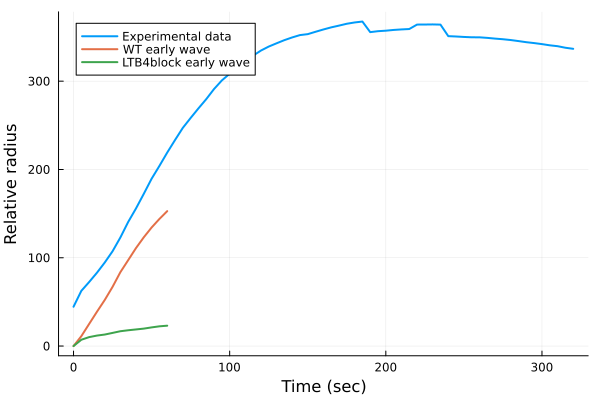

In [2]:
exp_data = CSV.read("Fig3d_largest-waves-mean-radius-v-time.csv", DataFrame)
plot(exp_data[:,:real_time],exp_data[:,:circle_radius], xlab = "Time (sec)", ylab = "Relative radius", label="Experimental data",lw = 2)

WT_early_wave_mean = CSV.read("WT_early_wave_mean_travel.csv", DataFrame)
plot!(WT_early_wave_mean[:,:real_time],WT_early_wave_mean[:,:rel_r], label="WT early wave",lw = 2)

LTB4block_early_wave_mean = CSV.read("LTB4block_early_wave_mean_travel.csv", DataFrame)
plot!(LTB4block_early_wave_mean[:,:real_time],LTB4block_early_wave_mean[:,:rel_r], label="LTB4block early wave",lw = 2)

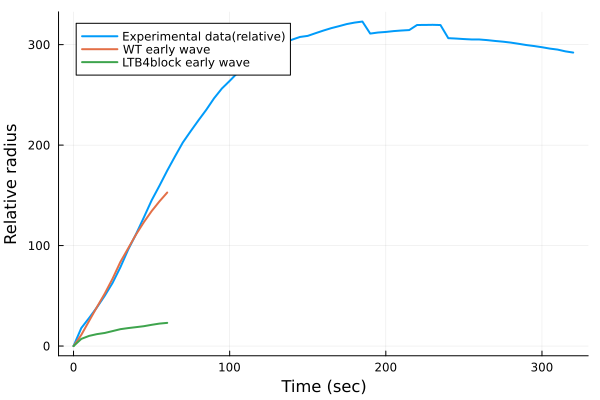

In [4]:
exp_data = CSV.read("Fig3d_largest-waves-mean-radius-v-time.csv", DataFrame)
plot(exp_data[:,:real_time],exp_data[:,:relative_radius], xlab = "Time (sec)", ylab = "Relative radius", label="Experimental data(relative)",lw = 2)

WT_early_wave_mean = CSV.read("WT_early_wave_mean_travel.csv", DataFrame)
plot!(WT_early_wave_mean[:,:real_time],WT_early_wave_mean[:,:rel_r], label="WT early wave",lw = 2)

LTB4block_early_wave_mean = CSV.read("LTB4block_early_wave_mean_travel.csv", DataFrame)
plot!(LTB4block_early_wave_mean[:,:real_time],LTB4block_early_wave_mean[:,:rel_r], label="LTB4block early wave",lw = 2)

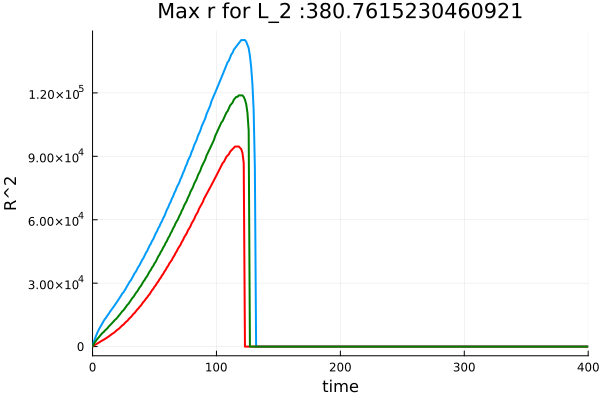

In [43]:

relay_sim = CSV.read("Son-0.00095_a-0.0104_L1a-0.0712_L1L2-100.0_R1b-71.0.csv",DataFrame)
relay_params = JSON.parsefile("Son-0.00095_a-0.0104_L1a-0.0712_L1L2-100.0_R1b-71.0_params.json")

Lth = relay_params["Lth"]
Rth = relay_params["Rth"]
dr = relay_params["dr"]
savedt = relay_params["dt"]

function wave_front_r(plane_sol_at_t, dr, S_cri)
    N_r = Int(length(plane_sol_at_t)/2)
    ix = findlast(plane_sol_at_t[1:N_r] .> S_cri)
    if ix == nothing
        return 0
    else
        return ix*dr
    end
end


N_t = size(relay_sim, 2)
ts = 0:savedt:savedt*(N_t-1)
r_Lth = [wave_front_r(relay_sim[:,ti], dr , Lth) for ti in 1:N_t]
r_Rth = [wave_front_r(relay_sim[:,ti], dr , Rth) for ti in 1:N_t]
r_mid = [wave_front_r(relay_sim[:,ti], dr , sqrt(Lth*Rth)) for ti in 1:N_t]

plot(ts, r_Rth.^2,label="",lw = 2)
plot!(ts, r_Lth.^2,label="", color="red",lw = 2)
plot!(ts, r_mid.^2,label="", color="green",lw = 2)

plot!(xlim=(0,savedt*(N_t-1)))
#plot!(ylim=(0,250000))
plot!(xlab = "time" , ylab = "R^2",title=string("Max r for L_2 :",maximum(r_Rth)))

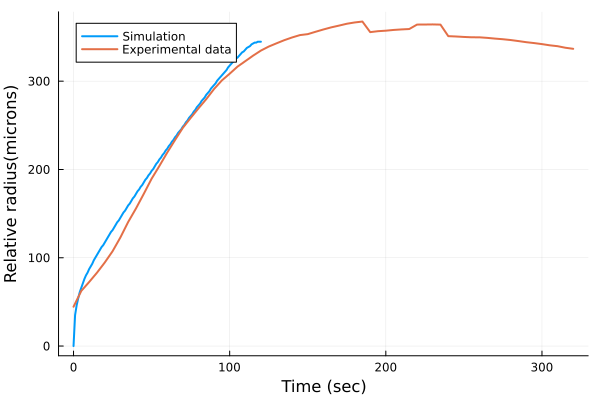

In [13]:
x_scale = 1
t_scale = 1
peak_index = argmax(r_mid)
# plot(ts*t_scale, r_Rth*x_scale,label="",lw = 2)
# plot!(ts*t_scale, r_Lth*x_scale,label="", color="red",lw = 2)
# plot!(ts*t_scale, r_mid*x_scale,label="", color="green",lw = 2)
# plot(ts[1:peak_index+2]*t_scale, r_Rth[1:peak_index+2]*x_scale,lw = 2, label = "Simulation")
# plot!(ts[1:peak_index+2]*t_scale, r_Lth[1:peak_index+2]*x_scale,lw = 2, label = "Simulation")
plot(ts[1:peak_index+2]*t_scale, r_mid[1:peak_index+2]*x_scale,lw = 2, label = "Simulation")
plot!(exp_data[:,:real_time],exp_data[:,:circle_radius], xlab = "Time (sec)", ylab = "Relative radius(microns)", label="Experimental data",lw = 2)


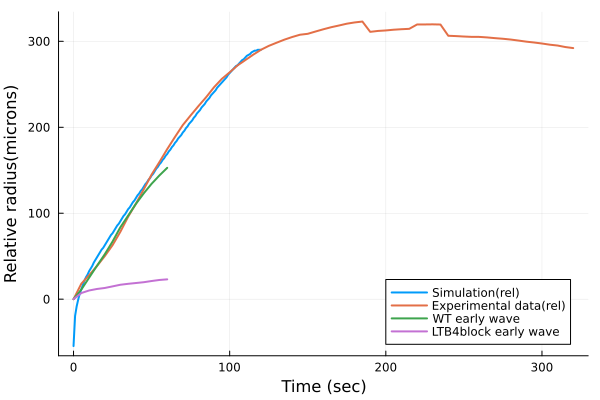

In [17]:
plot(ts[1:peak_index+2]*t_scale, r_mid[1:peak_index+2]*x_scale .- exp_data[:,:circle_radius][1].- 10,lw = 2, label = "Simulation(rel)")
plot!(exp_data[:,:real_time],exp_data[:,:relative_radius], xlab = "Time (sec)", ylab = "Relative radius(microns)", label="Experimental data(rel)",lw = 2)

WT_early_wave_mean = CSV.read("WT_early_wave_mean_travel.csv", DataFrame)
plot!(WT_early_wave_mean[:,:real_time],WT_early_wave_mean[:,:rel_r], label="WT early wave",lw = 2)

LTB4block_early_wave_mean = CSV.read("LTB4block_early_wave_mean_travel.csv", DataFrame)
plot!(LTB4block_early_wave_mean[:,:real_time],LTB4block_early_wave_mean[:,:rel_r], label="LTB4block early wave",lw = 2,legend=:bottomright)

# Compare with core diffusion

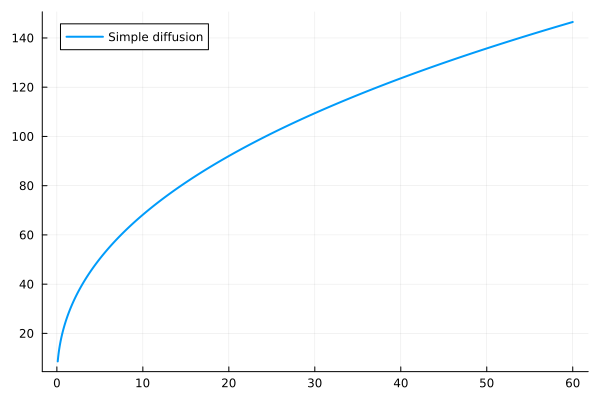

In [60]:
using LinearAlgebra: norm

function wavefront_radius_diff(D, M, t, C_0)
    term1 = log(C_0)
    term2 = log(M / (4π * D * t)^(3/2))
    r_square = -4D * t * (term1 - term2)
    
    return sqrt(r_square)
end

# Given parameters
D = 10  # Diffusion coefficient
M = 1e8  # Total amount of source at the origin
C_0 = 0.02  # Threshold concentration for the wavefront

# Given time series
# ts = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]  # Example time series
ts_diff = collect(0.1:0.02:60)

# Compute wavefront radii for each time in the series
radii = [wavefront_radius_diff(D, M, t, C_0) for t in ts_diff]

plot(ts_diff, radii, label="Simple diffusion", lw=2)

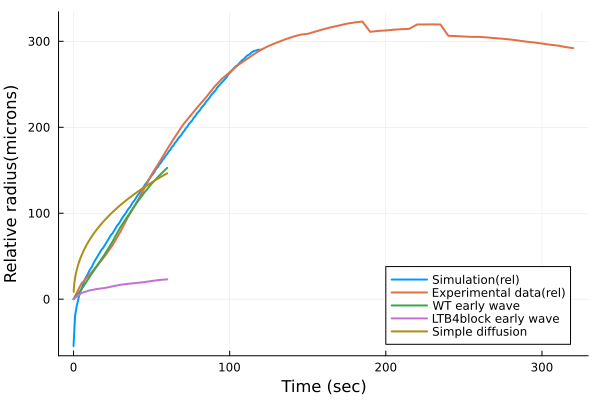

In [61]:
plot(ts[1:peak_index+2]*t_scale, r_mid[1:peak_index+2]*x_scale .- exp_data[:,:circle_radius][1].- 10,lw = 2, label = "Simulation(rel)")
plot!(exp_data[:,:real_time],exp_data[:,:relative_radius], xlab = "Time (sec)", ylab = "Relative radius(microns)", label="Experimental data(rel)",lw = 2)

WT_early_wave_mean = CSV.read("WT_early_wave_mean_travel.csv", DataFrame)
plot!(WT_early_wave_mean[:,:real_time],WT_early_wave_mean[:,:rel_r], label="WT early wave",lw = 2)

LTB4block_early_wave_mean = CSV.read("LTB4block_early_wave_mean_travel.csv", DataFrame)
plot!(LTB4block_early_wave_mean[:,:real_time],LTB4block_early_wave_mean[:,:rel_r], label="LTB4block early wave",lw = 2,legend=:bottomright)


plot!(ts_diff, radii, label="Simple diffusion", lw=2)

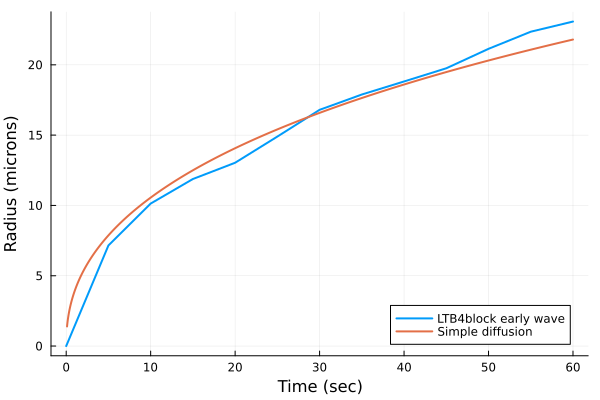

In [92]:
# Given parameters
D = 0.3  # Diffusion coefficient
M = 1e7 # Total amount of source at the origin
C_0 = 4  # Threshold concentration for the wavefront

# Given time series
# ts = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]  # Example time series
ts_diff = collect(0.1:0.02:60)

# Compute wavefront radii for each time in the series
radii = [wavefront_radius_diff(D, M, t, C_0) for t in ts_diff]


LTB4block_early_wave_mean = CSV.read("LTB4block_early_wave_mean_travel.csv", DataFrame)
plot(LTB4block_early_wave_mean[:,:real_time],LTB4block_early_wave_mean[:,:rel_r], label="LTB4block early wave",lw = 2,legend=:bottomright)


plot!(ts_diff, radii, label="Simple diffusion", lw=2, xlab="Time (sec)", ylab="Radius (microns)")